# PCA and Ridge Regression

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('./data-datamining.csv')
data

,F,phi_norm,a,c,C**2,a**2,a/t,a/c,ac/t,a/(c**2),a/(t**2),(a**2)/c,(a**2)/t,sin(a/t),cos(a/t),act,c**3,a**3,(c**3 * t)/a,(a**2 * c)/t,a * (c**2),tan(a/t),pn/a,pn/t,pn/c,(a**2+c**2)**.5,c**2+a**2
0,0.600740,1.974401,0.15,0.03,0.0009,0.0225,0.2,0.03,0.006,166.666667,0.266667,0.75,0.03,0.198669,0.980067,0.003375,0.000027,0.003375,0.000135,0.0009,0.000135,0.202710,13.162676,2.632535,65.813382,0.152971,0.0234
1,0.594690,1.944257,0.15,0.03,0.0009,0.0225,0.2,0.03,0.006,166.666667,0.266667,0.75,0.03,0.198669,0.980067,0.003375,0.000027,0.003375,0.000135,0.0009,0.000135,0.202710,12.961710,2.592342,64.808551,0.152971,0.0234
2,0.603424,1.913231,0.15,0.03,0.0009,0.0225,0.2,0.03,0.006,166.666667,0.266667,0.75,0.03,0.198669,0.980067,0.003375,0.000027,0.003375,0.000135,0.0009,0.000135,0.202710,12.754870,2.550974,63.774351,0.152971,0.0234
3,0.621775,1.884710,0.15,0.03,0.0009,0.0225,0.2,0.03,0.006,166.666667,0.266667,0.75,0.03,0.198669,0.980067,0.003375,0.000027,0.003375,0.000135,0.0009,0.000135,0.202710,12.564732,2.512946,62.823659,0.152971,0.0234
4,0.677776,1.837833,0.15,0.03,0.0009,0.0225,0.2,0.03,0.006,166.666667,0.266667,0.75,0.03,0.198669,0.980067,0.003375,0.000027,0.003375,0.000135,0.0009,0.000135,0.202710,12.252220,2.450444,61.261100,0.152971,0.0234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10365,0.823442,0.106499,0.60,1.20,1.4400,0.3600,0.8,1.20,0.960,0.416667,1.066667,0.30,0.48,0.717356,0.696707,0.540000,1.728000,0.216000,2.160000,0.5760,0.864000,1.029639,0.177498,0.141999,0.088749,1.341641,1.8000
10366,0.836329,0.084216,0.60,1.20,1.4400,0.3600,0.8,1.20,0.960,0.416667,1.066667,0.30,0.48,0.717356,0.696707,0.540000,1.728000,0.216000,2.160000,0.5760,0.864000,1.029639,0.140360,0.112288,0.070180,1.341641,1.8000
10367,0.849294,0.062293,0.60,1.20,1.4400,0.3600,0.8,1.20,0.960,0.416667,1.066667,0.30,0.48,0.717356,0.696707,0.540000,1.728000,0.216000,2.160000,0.5760,0.864000,1.029639,0.103822,0.083057,0.051911,1.341641,1.8000
10368,0.859566,0.040783,0.60,1.20,1.4400,0.3600,0.8,1.20,0.960,0.416667,1.066667,0.30,0.48,0.717356,0.696707,0.540000,1.728000,0.216000,2.160000,0.5760,0.864000,1.029639,0.067971,0.054377,0.033986,1.341641,1.8000


## Data Prep


In [3]:
y = data[['F']]
X = data.drop(['F'], axis=1)

data

,F,phi_norm,a,c,C**2,a**2,a/t,a/c,ac/t,a/(c**2),a/(t**2),(a**2)/c,(a**2)/t,sin(a/t),cos(a/t),act,c**3,a**3,(c**3 * t)/a,(a**2 * c)/t,a * (c**2),tan(a/t),pn/a,pn/t,pn/c,(a**2+c**2)**.5,c**2+a**2
0,0.600740,1.974401,0.15,0.03,0.0009,0.0225,0.2,0.03,0.006,166.666667,0.266667,0.75,0.03,0.198669,0.980067,0.003375,0.000027,0.003375,0.000135,0.0009,0.000135,0.202710,13.162676,2.632535,65.813382,0.152971,0.0234
1,0.594690,1.944257,0.15,0.03,0.0009,0.0225,0.2,0.03,0.006,166.666667,0.266667,0.75,0.03,0.198669,0.980067,0.003375,0.000027,0.003375,0.000135,0.0009,0.000135,0.202710,12.961710,2.592342,64.808551,0.152971,0.0234
2,0.603424,1.913231,0.15,0.03,0.0009,0.0225,0.2,0.03,0.006,166.666667,0.266667,0.75,0.03,0.198669,0.980067,0.003375,0.000027,0.003375,0.000135,0.0009,0.000135,0.202710,12.754870,2.550974,63.774351,0.152971,0.0234
3,0.621775,1.884710,0.15,0.03,0.0009,0.0225,0.2,0.03,0.006,166.666667,0.266667,0.75,0.03,0.198669,0.980067,0.003375,0.000027,0.003375,0.000135,0.0009,0.000135,0.202710,12.564732,2.512946,62.823659,0.152971,0.0234
4,0.677776,1.837833,0.15,0.03,0.0009,0.0225,0.2,0.03,0.006,166.666667,0.266667,0.75,0.03,0.198669,0.980067,0.003375,0.000027,0.003375,0.000135,0.0009,0.000135,0.202710,12.252220,2.450444,61.261100,0.152971,0.0234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10365,0.823442,0.106499,0.60,1.20,1.4400,0.3600,0.8,1.20,0.960,0.416667,1.066667,0.30,0.48,0.717356,0.696707,0.540000,1.728000,0.216000,2.160000,0.5760,0.864000,1.029639,0.177498,0.141999,0.088749,1.341641,1.8000
10366,0.836329,0.084216,0.60,1.20,1.4400,0.3600,0.8,1.20,0.960,0.416667,1.066667,0.30,0.48,0.717356,0.696707,0.540000,1.728000,0.216000,2.160000,0.5760,0.864000,1.029639,0.140360,0.112288,0.070180,1.341641,1.8000
10367,0.849294,0.062293,0.60,1.20,1.4400,0.3600,0.8,1.20,0.960,0.416667,1.066667,0.30,0.48,0.717356,0.696707,0.540000,1.728000,0.216000,2.160000,0.5760,0.864000,1.029639,0.103822,0.083057,0.051911,1.341641,1.8000
10368,0.859566,0.040783,0.60,1.20,1.4400,0.3600,0.8,1.20,0.960,0.416667,1.066667,0.30,0.48,0.717356,0.696707,0.540000,1.728000,0.216000,2.160000,0.5760,0.864000,1.029639,0.067971,0.054377,0.033986,1.341641,1.8000


## Density Plots

Examining the target variable 'F' and the features 'phi_norm', 'a', and 'c'. t is always constant throughout.

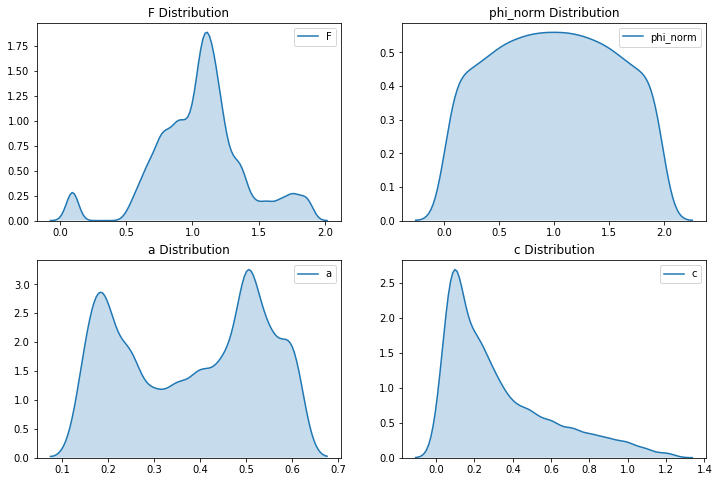

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
 
sns.kdeplot(data=data['F'], shade=True, ax=axes[0,0])
sns.kdeplot(data=data['phi_norm'], shade=True, ax=axes[0,1])
sns.kdeplot(data=data['a'], shade=True, ax=axes[1,0])
sns.kdeplot(data=data['c'], shade=True, ax=axes[1,1])

axes[0,0].title.set_text('F Distribution')
axes[0,1].title.set_text('phi_norm Distribution')
axes[1,0].title.set_text('a Distribution')
axes[1,1].title.set_text('c Distribution')

## Heatmap

### Showing all columns as an example and then another heat map with just some of the main variables.

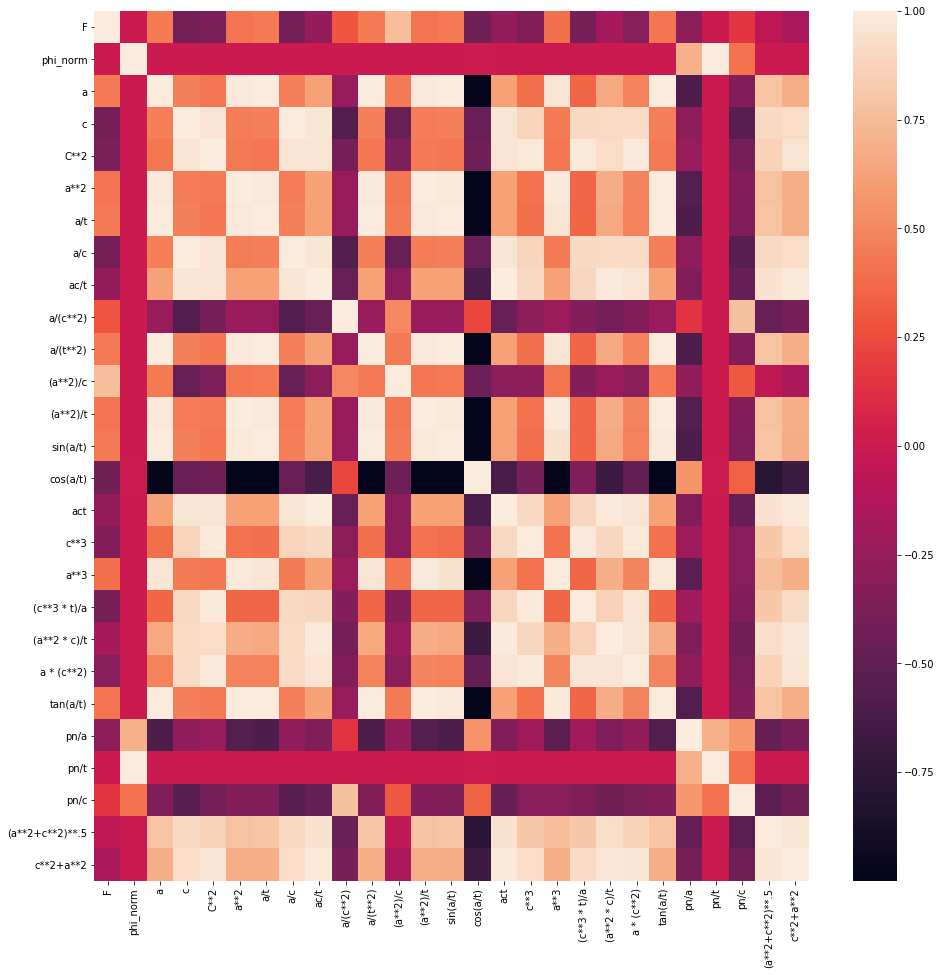

In [32]:
plt.figure(figsize=(16, 16))
sns.heatmap(data.corr())

Text(0.5, 1, 'Correlation Matrix Heatmap')

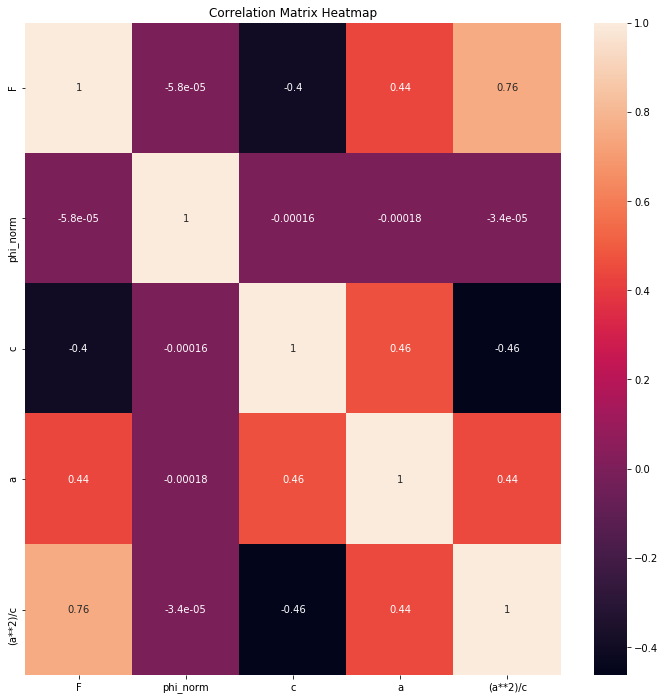

In [36]:
plt.figure(figsize=(12,12))
sns.heatmap(data[['F', 'phi_norm', 'c', 'a', '(a**2)/c']].corr(), annot=True)
plt.title('Correlation Matrix Heatmap')

## Ridge Regression without PCA

Ridge Regression with alpha: 1.0 mse: 0.04374406181213612
Ridge Regression with alpha: 53.578947368421055 mse: 0.04241397660690753
Ridge Regression with alpha: 106.15789473684211 mse: 0.04200982501133384
Ridge Regression with alpha: 158.73684210526318 mse: 0.04175701502501458
Ridge Regression with alpha: 211.31578947368422 mse: 0.041606769774704885
Ridge Regression with alpha: 263.89473684210526 mse: 0.04152806208915416
Ridge Regression with alpha: 316.47368421052636 mse: 0.04150175710004081
Ridge Regression with alpha: 369.0526315789474 mse: 0.04151558251147797
Ridge Regression with alpha: 421.63157894736844 mse: 0.04156129426840901
Ridge Regression with alpha: 474.2105263157895 mse: 0.04163310382927117
Ridge Regression with alpha: 526.7894736842105 mse: 0.04172678030188441
Ridge Regression with alpha: 579.3684210526316 mse: 0.04183911910200355
Ridge Regression with alpha: 631.9473684210527 mse: 0.04196761610609747
Ridge Regression with alpha: 684.5263157894738 mse: 0.0421102610332711

Text(0.5, 0, 'Alpha')

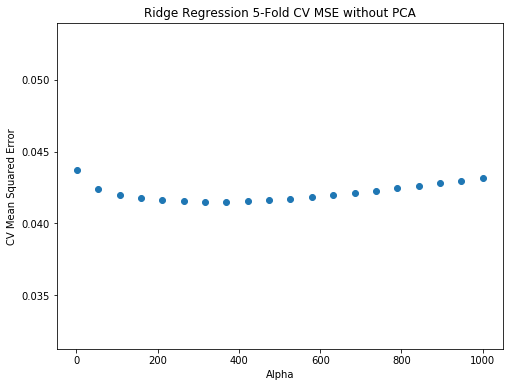

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alpha_arr = np.linspace(1, 1000, num=20)
scores_arr = []
coef_arr = []

for alpha in alpha_arr:
  model = Ridge(alpha=alpha, random_state=0)
  scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
  print('Ridge Regression with alpha:', alpha, 'mse:', -np.average(scores))
  scores_arr.append(-np.average(scores))

  # Get coef to see which variable importance
  model.fit(X,y)
  coef_arr.append(model.coef_)

plt.figure(figsize=(8, 6))
plt.scatter(alpha_arr, scores_arr)
plt.title('Ridge Regression 5-Fold CV MSE without PCA')
plt.ylabel('CV Mean Squared Error')
plt.xlabel('Alpha')


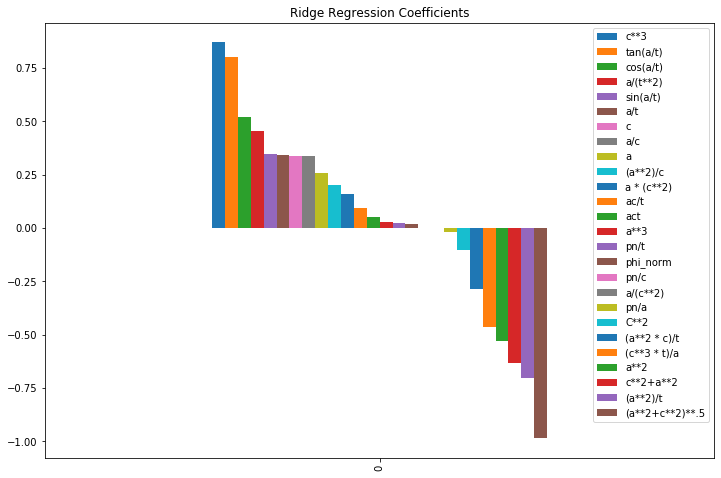

In [65]:
# Look at model parameters to determines variable importance.
coef = coef_arr[np.argmax(scores_arr)]
coef_df = pd.DataFrame(coef, columns=X.columns)
coef_df.sort_values(0, axis=1, inplace=True, ascending=False)
coef_df.plot.bar(figsize=(12, 8), title='Ridge Regression Coefficients')

## PCA and then Ridge Regression

PCA: explained variance - 0.607849779962973 , num of components - 1
Ridge Regression with PCA: mse - 0.14284286279474642
Random Forest Regressor with PCA: mse - 0.19456156521762188

PCA: explained variance - 0.8116951685878002 , num of components - 2
Ridge Regression with PCA: mse - 0.043779658334451264
Random Forest Regressor with PCA: mse - 0.06223162606344235

PCA: explained variance - 0.9177767518183367 , num of components - 3
Ridge Regression with PCA: mse - 0.04380006558001766
Random Forest Regressor with PCA: mse - 0.04036965832663196

PCA: explained variance - 0.9715179341928162 , num of components - 4
Ridge Regression with PCA: mse - 0.04515269675764009
Random Forest Regressor with PCA: mse - 0.03855779463007225

PCA: explained variance - 0.9827085411272104 , num of components - 5
Ridge Regression with PCA: mse - 0.04150690788487612
Random Forest Regressor with PCA: mse - 0.039965919316379925

PCA: explained variance - 0.9903788044893739 , num of components - 6
Ridge Regressio

No handles with labels found to put in legend.


PCA: explained variance - 0.9989694775541579 , num of components - 9
Ridge Regression with PCA: mse - 0.04601633691010243
Random Forest Regressor with PCA: mse - 0.03811567846617984



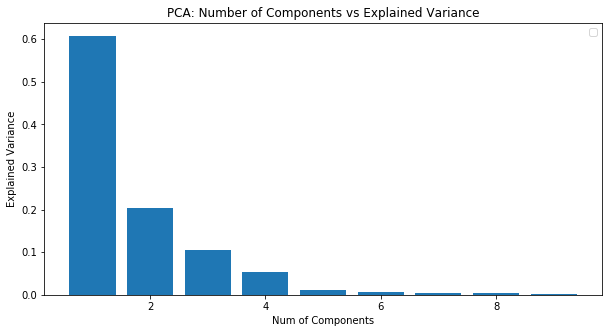

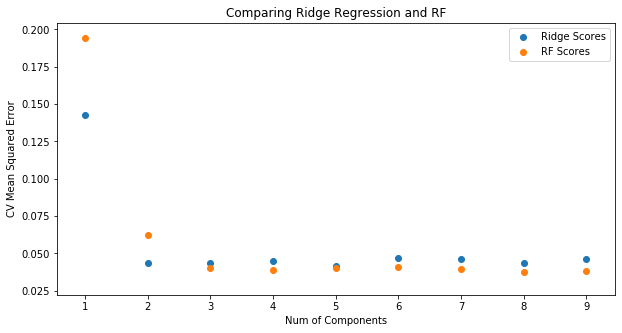

In [70]:
# Scale before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

explained_variance_arr = []

def display_results():
  plt.figure(figsize=(10,5))

  plt.bar(range(1,10), explained_variance_arr)

  plt.title('PCA: Number of Components vs Explained Variance')
  plt.xlabel('Num of Components')
  plt.ylabel('Explained Variance')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10,5))
  plt.scatter(range(1,10), ridge_scores, label='Ridge Scores')
  plt.scatter(range(1,10), random_forest_scores, label='RF Scores')

  plt.title('Comparing Ridge Regression and RF')
  plt.xlabel('Num of Components')
  plt.ylabel('CV Mean Squared Error')
  plt.legend()
  plt.show()

ridge_scores = []
random_forest_scores = []

for num_components in range(1, 10):
  pca = PCA(n_components=num_components, random_state=0)
  components = pca.fit_transform(X_scaled)
  columns = ['Component' + str(i) for i in range(components.shape[1])]
  components_df = pd.DataFrame(components, columns=columns)

  model = Ridge(alpha=1)
  rf_model = RandomForestRegressor()
  scores = cross_val_score(model, components_df, y, cv=5, scoring='neg_mean_squared_error')
  rf_scores = cross_val_score(rf_model, components_df, data['F'], cv=5, scoring='neg_mean_squared_error')
  print('PCA: explained variance -', sum(pca.explained_variance_ratio_), ', num of components -', components.shape[1])
  print('Ridge Regression with PCA: mse -', -np.average(scores))
  print('Random Forest Regressor with PCA: mse -', -np.average(rf_scores))
  print()

  ridge_scores.append(-np.average(scores))
  random_forest_scores.append(-np.average(rf_scores))
  explained_variance_arr = pca.explained_variance_ratio_

display_results()
